In [1]:
%run ./PPS_Expansion_Model.ipynb

/home/renato-paredes/.virtualenvs/gifted/lib/python3.13/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


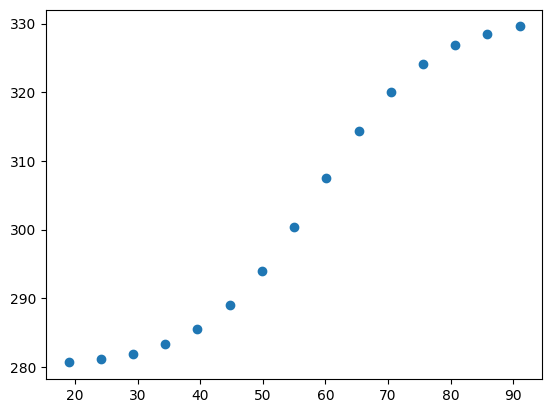

In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - ts * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

##Pre-Training
###Healthy Controls
ymin = 280
ymax = 331
fprHCCP = 100 - 1.377 * v
fprHCS = 1 / 0.11  # negative

HC_RTs = RTsig(a_distances, fprHCCP, fprHCS)
plt.scatter(a_distances, HC_RTs)

In [3]:
from scipy.optimize import differential_evolution

HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)


def boundary_hc_model_run(theta):
    # feedforward and feedback
    HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
        Wt_0=6.5,
        Wa_0=6.5,
        Wv_0=6.5,
        Bt_0=2.5,
        Ba_0=2.5,
        Bv_0=2.5,
        k1=theta[0],
        k2=theta[1],
        lim=theta[2],
        alpha=theta[3],
    )

    _, _, _, _, HCrt = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=HCLt,
        La=HCLa,
        Lv=HCLv,
        Wt=HCWt,
        Wa=HCWa,
        Wv=HCWv,
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    HC_Model_RTs = fit_RT(xf=HCrt, yf=HC_RTs)
    cost = np.sum(np.square(np.divide(HC_RTs - (HC_Model_RTs), HC_RTs)))

    return cost * 100000


bounds = [(1, 50), (500, 1000), (20, 80), (0.25, 1)]  # k1, k2, lim, alpha
boundary_hc_res = differential_evolution(
    boundary_hc_model_run,
    bounds,
    disp=True,
    workers=30,
    updating="deferred",
    polish=False,
)

differential_evolution step 1: f(x)= 19.920289227501357
differential_evolution step 2: f(x)= 16.85157550515551
differential_evolution step 3: f(x)= 7.948974260392794
differential_evolution step 4: f(x)= 7.948974260392794
differential_evolution step 5: f(x)= 7.948974260392794
differential_evolution step 6: f(x)= 7.948974260392794
differential_evolution step 7: f(x)= 7.948974260392794
differential_evolution step 8: f(x)= 7.948974260392794
differential_evolution step 9: f(x)= 7.948974260392794
differential_evolution step 10: f(x)= 7.948974260392794
differential_evolution step 11: f(x)= 7.948974260392794
differential_evolution step 12: f(x)= 7.948974260392794
differential_evolution step 13: f(x)= 7.948974260392794
differential_evolution step 14: f(x)= 7.948974260392794
differential_evolution step 15: f(x)= 7.698191993501499
differential_evolution step 16: f(x)= 7.698191993501499
differential_evolution step 17: f(x)= 7.698191993501499
differential_evolution step 18: f(x)= 7.698191993501499


In [5]:
print(boundary_hc_res)

             message: Optimization terminated successfully.
             success: True
                 fun: 5.509275579454835
                   x: [ 1.289e+01  7.552e+02  3.674e+01  9.797e-01]
                 nit: 101
                nfev: 6120
          population: [[ 1.289e+01  7.552e+02  3.674e+01  9.797e-01]
                       [ 1.288e+01  7.966e+02  3.678e+01  9.796e-01]
                       ...
                       [ 1.301e+01  7.903e+02  3.663e+01  9.803e-01]
                       [ 1.312e+01  8.518e+02  3.651e+01  9.815e-01]]
 population_energies: [ 5.509e+00  5.509e+00 ...  5.509e+00  5.509e+00]


In [6]:
## Fitted model
HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)

HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=1.289e01,
    k2=7.552e02,
    lim=3.674e01,
    alpha=9.797e-01,
)

zt, za, zm, zv, HC_Model_RTs = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

HC_Model_RTs_scaled = fit_RT(xf=HC_Model_RTs, yf=HC_RTs)

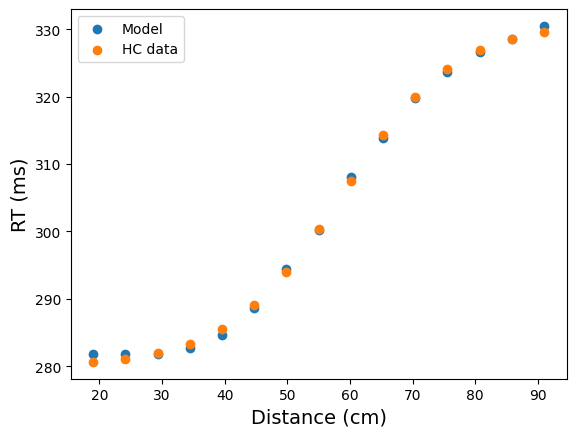

In [7]:
plt.scatter(a_distances, HC_Model_RTs_scaled, label="Model")
plt.scatter(a_distances, HC_RTs, label="HC data")
plt.ylabel("RT (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
plt.legend()